# Team Name: Indranil & Radheshyam



### Name and ID of memeber 1: Radheshyam Routh

### Name and ID of memeber 2: Indranil Ganguly  

In [1]:
# Necessary Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Importing OneHotEncoder to handle categorical data
# importing StandardScaler for standardize my data,
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Linear Regression importing
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [9]:
from sklearn.linear_model import SGDRegressor

## 1. Load the Dataset

In [10]:
# Loading a dataset
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

# Load the dataset into a DataFrame
diabetes_data = pd.read_csv(url, delimiter='\t') 

# Display the first few rows of the dataset
diabetes_data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [11]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [12]:
# Since the feature 'Sex' is given as numerical data so we need to 
# transform it categoriacl data to so basic statistics

diabetes_data['SEX'] = diabetes_data['SEX'].astype('category')

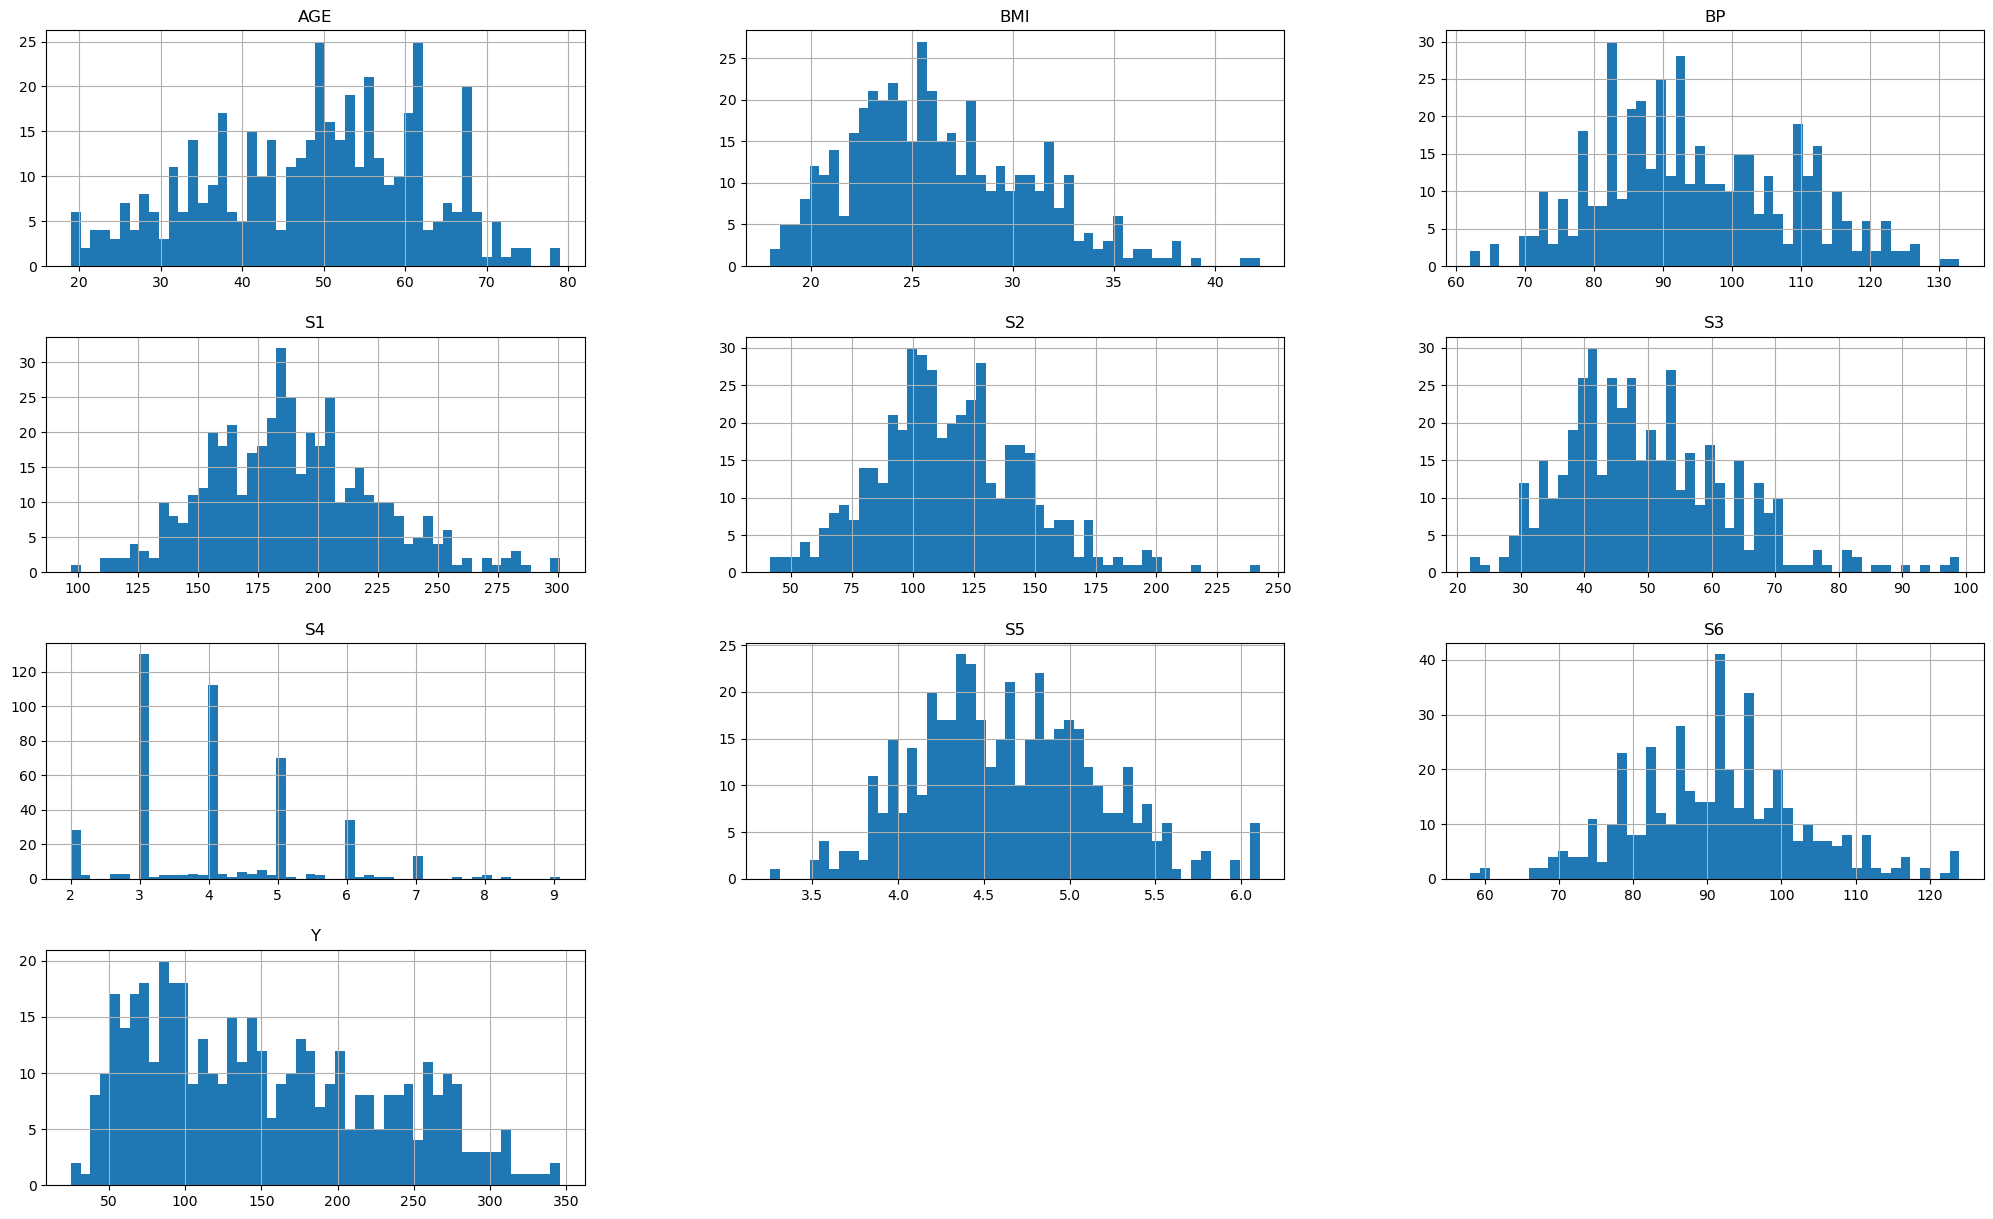

In [13]:
diabetes_data.hist(bins=50, figsize=(25,15))
plt.show()

In [14]:
# Basic Statistics

print(diabetes_data.describe())

              AGE         BMI          BP          S1          S2          S3  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100   26.375792   94.647014  189.140271  115.439140   49.788462   
std     13.109028    4.418122   13.831283   34.608052   30.413081   12.934202   
min     19.000000   18.000000   62.000000   97.000000   41.600000   22.000000   
25%     38.250000   23.200000   84.000000  164.250000   96.050000   40.250000   
50%     50.000000   25.700000   93.000000  186.000000  113.000000   48.000000   
75%     59.000000   29.275000  105.000000  209.750000  134.500000   57.750000   
max     79.000000   42.200000  133.000000  301.000000  242.400000   99.000000   

               S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  
mean     4.070249    4.641411   91.260181  152.133484  
std      1.290450    0.522391   11.496335   77.093005  
min      2.000000    3.258100   58.000000   25

In [15]:
diabetes_data.describe(include='category')

,SEX
count,442
unique,2
top,1
freq,235


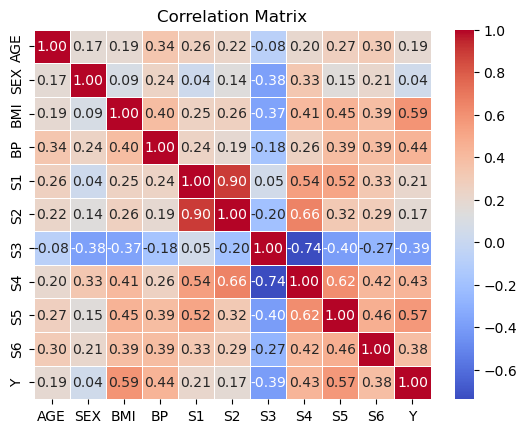

In [16]:
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 2. Data Preporcessing

In [17]:
# Checking for missing values

diabetes_data.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [18]:
# Spliting the dataset into features (X) and target (y)

X = diabetes_data.drop(columns='Y')
y = diabetes_data['Y']

# Spliting the data into training and test sets ( 80% training, 20% testing)
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [19]:
# Select the numerical and categorical columns
numerical_cols = X_train_pre.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = ['SEX']  

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' to avoid dummy variable trap
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data
X_train_pipe = pipeline.fit_transform(X_train_pre)

# Transform the test data
X_test_pipe = pipeline.transform(X_test_pre)

numeric_col = [col for col in diabetes_data.columns if col not in ['Y', 'SEX']]
encoded_col = ['SEX']
processed_col = numeric_col + encoded_col
X_train = pd.DataFrame(X_train_pipe, columns=processed_col)
X_test = pd.DataFrame(X_test_pipe, columns=processed_col)

### ---------- Define Some Necessary Functions and Initialize Some Necessary Lists ---------

In [20]:
# A function for calculating performance metrics
def calculate_metrics(y_true, y_pred):   
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# A function for printing performance metrics
def print_performance_metric(mae, mse, R2):
    print(f"Mean Absolute Error (MAE): {mae}.")
    print(f"Mean Squared Error (MSE): {mse}.")
    print(f"R-squared Score (R^2): {R2}.")

Model_list = []
Training_time_list = []

# List for storing training errors and R2 score
MAE_list_train = []
MSE_list_train = []
R2_list_train = []

# List for storing test errors and R2 score
MAE_list = []
MSE_list = []
R2_list = []

## 3. Simple Linear Regression

In [21]:
# Storing the model name
Model_list.append('Linear Regr.')

In [22]:
# Defining the linear regression model
model = LinearRegression()

# Fiting the model on the training data
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

time_SLR = end_time - start_time

# Storing required time and printing
Training_time_list.append(time_SLR)
#print(f'Training Time (Linear Regression): {time_SLR} seconds.')

# Predicting on the train data
train_y_pred_SLR = model.predict(X_train)
mae_SLR_train, mse_SLR_train, R2_SLR_train = calculate_metrics(y_train, train_y_pred_SLR)
# Training Data
MAE_list_train.append(mae_SLR_train)
MSE_list_train.append(mse_SLR_train)
R2_list_train.append(R2_SLR_train)
# Training Data
print("Performance Metrics on Training Data for Simple Linear Regression is: ")
print_performance_metric(mae_SLR_train, mse_SLR_train, R2_SLR_train)
print("\n------------------------------------------------\n")


# Predicting on the test data
y_pred_SLR = model.predict(X_test)

# Calculating performance metrics [MSE, MAE, R^2] (test data)
mae_SLR, mse_SLR, R2_SLR = calculate_metrics(y_test, y_pred_SLR)

# Storing the performance metrics [MSE, MAE, R^2] (test data)
MAE_list.append(mae_SLR)
MSE_list.append(mse_SLR)
R2_list.append(R2_SLR)

# Printing the metrics
print("Performance Metrics on Test Data for Simple Linear Regression is: ")
print_performance_metric(mae_SLR, mse_SLR, R2_SLR)

Performance Metrics on Training Data for Simple Linear Regression is: 
Mean Absolute Error (MAE): 43.483503523980396.
Mean Squared Error (MSE): 2868.549702835578.
R-squared Score (R^2): 0.5279193863361497.

------------------------------------------------

Performance Metrics on Test Data for Simple Linear Regression is: 
Mean Absolute Error (MAE): 42.79409467959994.
Mean Squared Error (MSE): 2900.1936284934814.
R-squared Score (R^2): 0.4526027629719195.


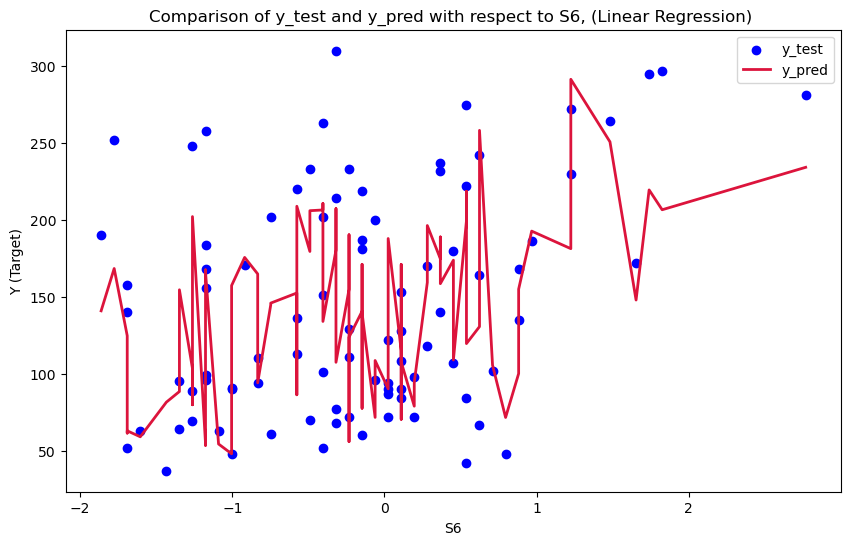

In [23]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_SLR[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Linear Regression) ')
plt.legend()

# Show plot
plt.show()

## 4. Polynomial Regression

##  polynomial regression for degrees 2

In [24]:
degree_i = 2
# Defining and creating polynomial features
poly = PolynomialFeatures(degree=degree_i, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
    
Model_list.append('Poly. Regr., degree '+str(degree_i))
# Fiting the linear model on polynomial features
model = LinearRegression()
start_time = time.time()
model.fit(X_train_poly, y_train)
end_time = time.time()
time_PR = end_time - start_time

# Storing required time and printing
Training_time_list.append(time_PR)
#print(f'Training Time (Polynomial Regression of degree {degree_i}): {time_PR} seconds.')

# Predicting and evaluating performance on Training Data
y_pred_PR_train = model.predict(X_train_poly)

# Calculating performance metrics for polynomial regression (Training Data)
mae_PR_train, mse_PR_train, R2_PR_train = calculate_metrics(y_train, y_pred_PR_train)
    
MAE_list_train.append(mae_PR_train)
MSE_list_train.append(mse_PR_train)
R2_list_train.append(R2_PR_train)
    
# Printing performance metrics for polynomial regression (Training Data)

print(f"Performance metrics on Training Data for polynomial regression of degree {degree_i} is:")
print_performance_metric(mae_PR_train, mse_PR_train, R2_PR_train)
print("\n------------------------------------------------\n")


# Predicting and evaluating performance on Test data 
y_pred_PR = model.predict(X_test_poly)

# Calculating performance metrics for polynomial regression (Test data )
mae_PR, mse_PR, R2_PR = calculate_metrics(y_test, y_pred_PR)
    
MAE_list.append(mae_PR)
MSE_list.append(mse_PR)
R2_list.append(R2_PR)
    
# Printing performance metrics for polynomial regression (Test data )

print(f"Performance metrics on Test data for polynomial regression of degree {degree_i} is:")
print_performance_metric(mae_PR, mse_PR, R2_PR)


Performance metrics on Training Data for polynomial regression of degree 2 is:
Mean Absolute Error (MAE): 39.142609989577444.
Mean Squared Error (MSE): 2393.1386180597856.
R-squared Score (R^2): 0.6061583502354679.

------------------------------------------------

Performance metrics on Test data for polynomial regression of degree 2 is:
Mean Absolute Error (MAE): 43.581693254652556.
Mean Squared Error (MSE): 3096.028307344285.
R-squared Score (R^2): 0.41563993364079765.


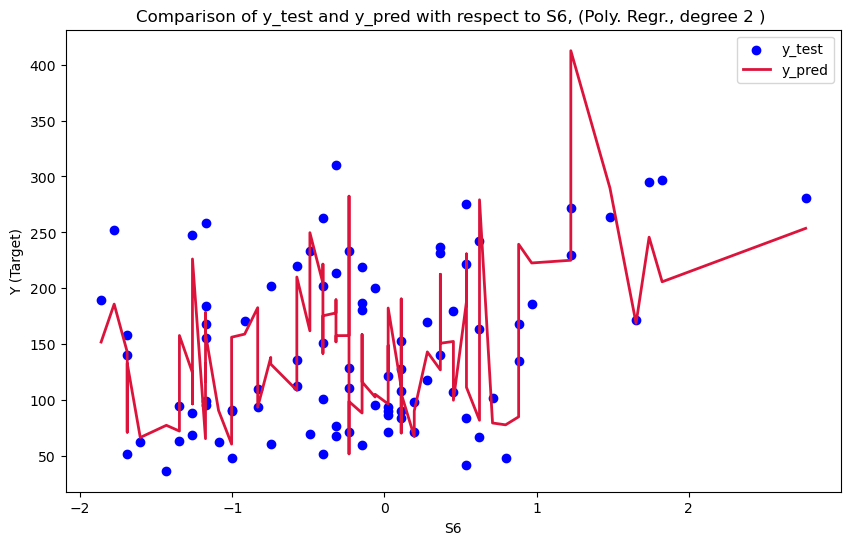

In [25]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_PR[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Poly. Regr., degree 2 ) ')
plt.legend()

# Show plot
plt.show()

##  polynomial regression for degrees 3

In [26]:
degree_i = 3
# Defining and creating polynomial features
poly = PolynomialFeatures(degree=degree_i, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
    
Model_list.append('Poly. Regr., degree '+str(degree_i))
# Fiting the linear model on polynomial features
model = LinearRegression()
start_time = time.time()
model.fit(X_train_poly, y_train)
end_time = time.time()
time_PR = end_time - start_time

# Storing required time and printing
Training_time_list.append(time_PR)
#print(f'Training Time (Polynomial Regression of degree {degree_i}): {time_PR} seconds.')


# Predicting and evaluating performance on Training Data
y_pred_PR_train = model.predict(X_train_poly)

# Calculating performance metrics for polynomial regression (Tr. data)
mae_PR_train, mse_PR_train, R2_PR_train = calculate_metrics(y_train, y_pred_PR_train)
    
MAE_list_train.append(mae_PR_train)
MSE_list_train.append(mse_PR_train)
R2_list_train.append(R2_PR_train)
    
# Printing performance metrics for polynomial regression (Tr. data)

print(f"Performance metrics on Training Data for polynomial regression of degree {degree_i} is:")
print_performance_metric(mae_PR_train, mse_PR_train, R2_PR_train)
print("\n------------------------------------------------\n")

    
# Predicting and evaluating performance on Test data 
y_pred_PR = model.predict(X_test_poly)

# Calculating performance metrics for polynomial regression (Te. data)
mae_PR, mse_PR, R2_PR = calculate_metrics(y_test, y_pred_PR)
    
MAE_list.append(mae_PR)
MSE_list.append(mse_PR)
R2_list.append(R2_PR)
    
# Printing performance metrics for polynomial regression (Te. data)

print(f"Performance metrics on Test data  for polynomial regression of degree {degree_i} is:")
print_performance_metric(mae_PR, mse_PR, R2_PR)


Performance metrics on Training Data for polynomial regression of degree 3 is:
Mean Absolute Error (MAE): 18.6889584851593.
Mean Squared Error (MSE): 745.6184484776616.
R-squared Score (R^2): 0.877292691017877.

------------------------------------------------

Performance metrics on Test data  for polynomial regression of degree 3 is:
Mean Absolute Error (MAE): 164.85389734627083.
Mean Squared Error (MSE): 82446.04875698865.
R-squared Score (R^2): -14.561284891485457.


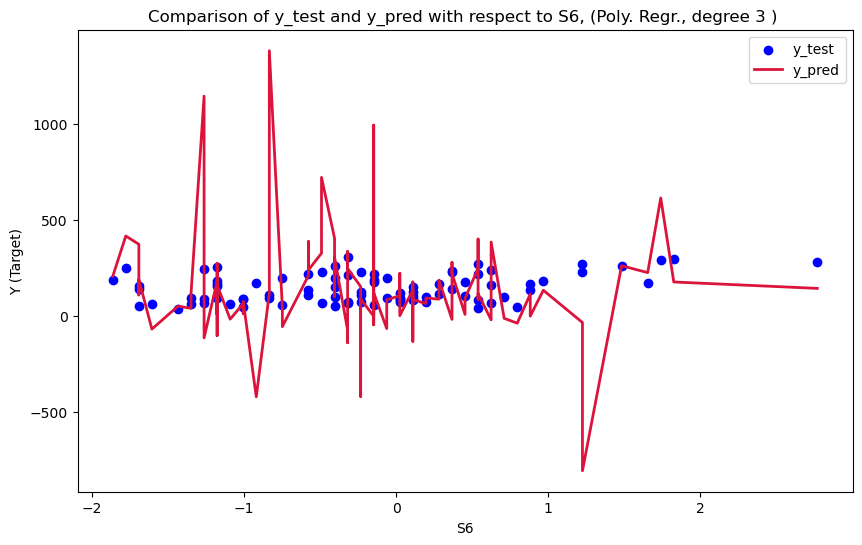

In [27]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_PR[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Poly. Regr., degree 3 ) ')
plt.legend()

# Show plot
plt.show()

##  polynomial regression for degrees 4

In [28]:
degree_i = 4
# Defining and creating polynomial features
poly = PolynomialFeatures(degree=degree_i, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
    
Model_list.append('Poly. Regr., degree '+str(degree_i))
# Fiting the linear model on polynomial features
model = LinearRegression()
start_time = time.time()
model.fit(X_train_poly, y_train)
end_time = time.time()
time_PR = end_time - start_time

# Storing required time and printing
Training_time_list.append(time_PR)
#print(f'Training Time (Polynomial Regression of degree {degree_i}): {time_PR} seconds.')
    
# Predicting and evaluating performance on Training Data
y_pred_PR_train = model.predict(X_train_poly)

# Calculating performance metrics for polynomial regression (Tr. data)
mae_PR_train, mse_PR_train, R2_PR_train = calculate_metrics(y_train, y_pred_PR_train)
    
MAE_list_train.append(mae_PR_train)
MSE_list_train.append(mse_PR_train)
R2_list_train.append(R2_PR_train)
    
# Printing performance metrics for polynomial regression (Tr. data)

print(f"Performance metrics on Training Data for polynomial regression of degree {degree_i} is:")
print_performance_metric(mae_PR_train, mse_PR_train, R2_PR_train)
print("\n------------------------------------------------\n")
    
    
# Predicting and evaluating performance on Test data 
y_pred_PR = model.predict(X_test_poly)

# Calculating performance metrics for polynomial regression (Te. data)
mae_PR, mse_PR, R2_PR = calculate_metrics(y_test, y_pred_PR)
    
MAE_list.append(mae_PR)
MSE_list.append(mse_PR)
R2_list.append(R2_PR)
    
# Printing performance metrics for polynomial regression (Te. data)

print(f"Performance metrics on Test data  for polynomial regression of degree {degree_i} is:")
print_performance_metric(mae_PR, mse_PR, R2_PR)


Performance metrics on Training Data for polynomial regression of degree 4 is:
Mean Absolute Error (MAE): 2.1729322779256185e-12.
Mean Squared Error (MSE): 1.9358937594295717e-23.
R-squared Score (R^2): 1.0.

------------------------------------------------

Performance metrics on Test data  for polynomial regression of degree 4 is:
Mean Absolute Error (MAE): 273.36766325604583.
Mean Squared Error (MSE): 186592.7314246862.
R-squared Score (R^2): -34.21845735674317.


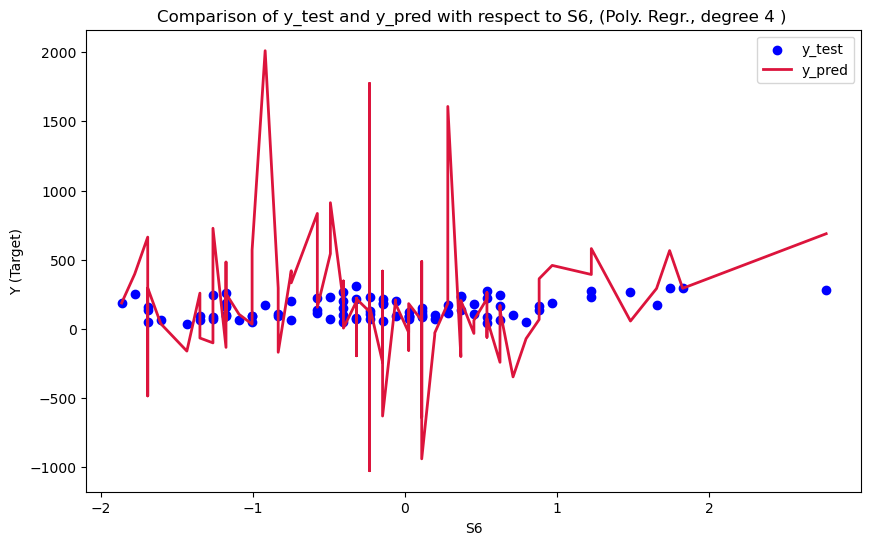

In [29]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_PR[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Poly. Regr., degree 4 ) ')
plt.legend()

# Show plot
plt.show()

## 5. Gradient Descent Methods

## (a) Batch Gradient descent

In [30]:
Model_list.append('Batch G. D.')

In [31]:
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n+1)
    history = []
    
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term
    
    for epoch in range(epochs):
        prediction = np.dot(X_b, theta)
        errors = prediction - y
        gradients = np.dot(X_b.T, errors) / m
        
        theta -= learning_rate * gradients
    
        cost = (1/(2*m)) * np.sum(errors**2)
        
        history.append(cost)

    return theta, history


start_time = time.time()
theta_batch, history_batch = batch_gradient_descent(X_train, y_train)
end_time = time.time()

time_BGD = end_time - start_time
Training_time_list.append(time_BGD)


## (b) Stochastic Gradient descent

In [32]:
Model_list.append('Stochastic G. D.')

In [33]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n+1)
    history = []
    
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term
    
    for epoch in range(epochs):
        cost = 0
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            prediction = np.dot(xi, theta)
            errors = prediction - yi.values # Ensure yi is treated as a NumPy array
            gradients = xi.T.dot(errors)
            
            theta -= learning_rate * gradients
            
            cost += (1/(2*m)) * np.sum(errors**2)
            
        prediction = np.dot(X_b, theta)
        cost = (1/(2*m)) * np.sum((prediction - y) ** 2)   
        history.append(cost)

    return theta, history


start_time = time.time()
theta_sgd, history_sgd = stochastic_gradient_descent(X_train, y_train)
end_time = time.time()
time_SGD = end_time - start_time
Training_time_list.append(time_SGD)


## (c) Mini-batch Gradient Descent

In [34]:
Model_list.append('Mini-batch G. D.')

In [35]:
def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000, batch_size=30):
    m, n = X.shape
    theta = np.zeros(n+1)
    history = []
    
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term
    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_b[shuffled_indices]
        y_shuffled = y.iloc[shuffled_indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            
            prediction = np.dot(xi, theta)
            errors = prediction - yi
            gradients = np.dot(xi.T, errors) / batch_size
            
            theta -= learning_rate * gradients
        
        prediction = np.dot(X_b, theta)
        cost = (1/(2*m)) * np.sum((prediction - y) ** 2)
        history.append(cost)
    return theta, history


start_time = time.time()
theta_mini_batch, history_mini_batch = mini_batch_gradient_descent(X_train, y_train)
end_time = time.time()
time_mbgd = end_time - start_time

Training_time_list.append(time_mbgd)

In [36]:
# Add intercept term to the X_train data and X_test data
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


# Define prediction function
def predict(X, theta):
    return X.dot(theta)


# Make predictions on the training data
y_pred_batch_train = predict(X_train_b, theta_batch)
y_pred_sgd_train = predict(X_train_b, theta_sgd)
y_pred_mini_batch_train = predict(X_train_b, theta_mini_batch)


# Calculate performance metrics for each gradient descent method (Tr. data)
mae_batch_train, mse_batch_train, r2_batch_train = calculate_metrics(y_train, y_pred_batch_train)
mae_sgd_train, mse_sgd_train, r2_sgd_train = calculate_metrics(y_train, y_pred_sgd_train)
mae_mini_batch_train, mse_mini_batch_train, r2_mini_batch_train = calculate_metrics(y_train, y_pred_mini_batch_train)



# Make predictions on the test data
y_pred_batch = predict(X_test_b, theta_batch)
y_pred_sgd = predict(X_test_b, theta_sgd)
y_pred_mini_batch = predict(X_test_b, theta_mini_batch)


# Calculate performance metrics for each gradient descent method (Te. data)
mae_batch, mse_batch, r2_batch = calculate_metrics(y_test, y_pred_batch)
mae_sgd, mse_sgd, r2_sgd = calculate_metrics(y_test, y_pred_sgd)
mae_mini_batch, mse_mini_batch, r2_mini_batch = calculate_metrics(y_test, y_pred_mini_batch)

# Training data performance appending
MAE_list_train.append(mae_batch_train)
MAE_list_train.append(mae_sgd_train)
MAE_list_train.append(mae_mini_batch_train)

MSE_list_train.append(mse_batch_train)
MSE_list_train.append(mse_sgd_train)
MSE_list_train.append(mse_mini_batch_train)
                
R2_list_train.append(r2_batch_train)
R2_list_train.append(r2_sgd_train)
R2_list_train.append(r2_mini_batch_train)

# Test data performance appending
MAE_list.append(mae_batch)
MAE_list.append(mae_sgd)
MAE_list.append(mae_mini_batch)


MSE_list.append(mse_batch)
MSE_list.append(mse_sgd)
MSE_list.append(mse_mini_batch)

R2_list.append(r2_batch)
R2_list.append(r2_sgd)
R2_list.append(r2_mini_batch)

# Print the performance metrics
print("Batch Gradient Descent on Training Data Performance Metrics:")
print_performance_metric(mae_batch_train, mse_batch_train, r2_batch_train)
print("\n------------------------------------------------")
print("Batch Gradient Descent on Test data  Performance Metrics:")
print_performance_metric(mae_batch, mse_batch, r2_batch)
print("\n------------------------------------------------")
print("------------------------------------------------")

print("Stochastic Gradient Descent on Training Data Performance Metrics:")
print_performance_metric(mae_sgd_train, mse_sgd_train, r2_sgd_train)
print("\n------------------------------------------------")
print("Stochastic Gradient Descent on Test Data Performance Metrics:")
print_performance_metric(mae_sgd, mse_sgd, r2_sgd)
print("\n------------------------------------------------")
print("------------------------------------------------")

print("Mini-Batch Gradient Descent  on Training Data  Performance Metrics:")
print_performance_metric(mae_mini_batch_train, mse_mini_batch_train, r2_mini_batch_train)
print("\n------------------------------------------------")
print("Mini-Batch Gradient Descent  on test Data Performance Metrics:")
print_performance_metric(mae_mini_batch, mse_mini_batch, r2_mini_batch)

Batch Gradient Descent on Training Data Performance Metrics:
Mean Absolute Error (MAE): 44.493607491019155.
Mean Squared Error (MSE): 2965.1522648129844.
R-squared Score (R^2): 0.5120213885797524.

------------------------------------------------
Batch Gradient Descent on Test data  Performance Metrics:
Mean Absolute Error (MAE): 43.84552922345909.
Mean Squared Error (MSE): 2934.218131792115.
R-squared Score (R^2): 0.446180805860525.

------------------------------------------------
------------------------------------------------
Stochastic Gradient Descent on Training Data Performance Metrics:
Mean Absolute Error (MAE): 44.55323889404908.
Mean Squared Error (MSE): 3057.610589105084.
R-squared Score (R^2): 0.49680541291546476.

------------------------------------------------
Stochastic Gradient Descent on Test Data Performance Metrics:
Mean Absolute Error (MAE): 43.73449626433137.
Mean Squared Error (MSE): 3035.4893322779685.
R-squared Score (R^2): 0.42706636646867324.

-------------

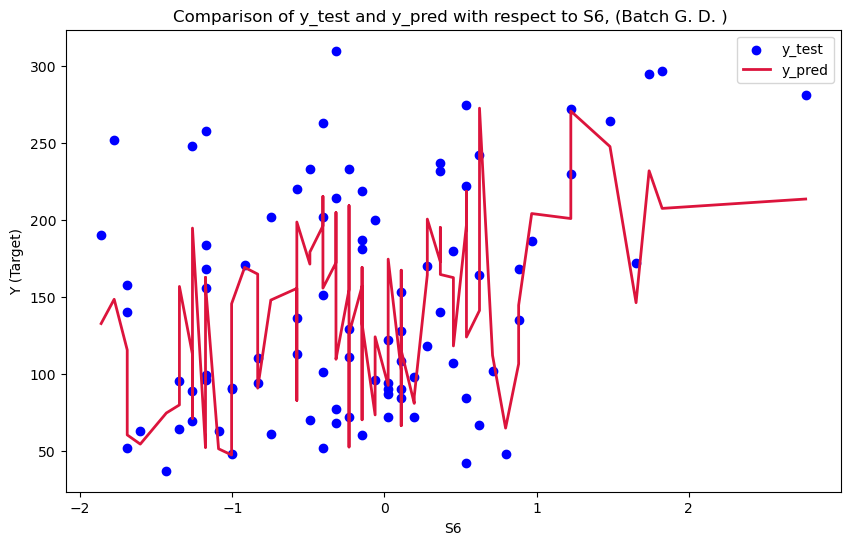

In [37]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_batch[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Batch G. D. ) ')
plt.legend()

# Show plot
plt.show()

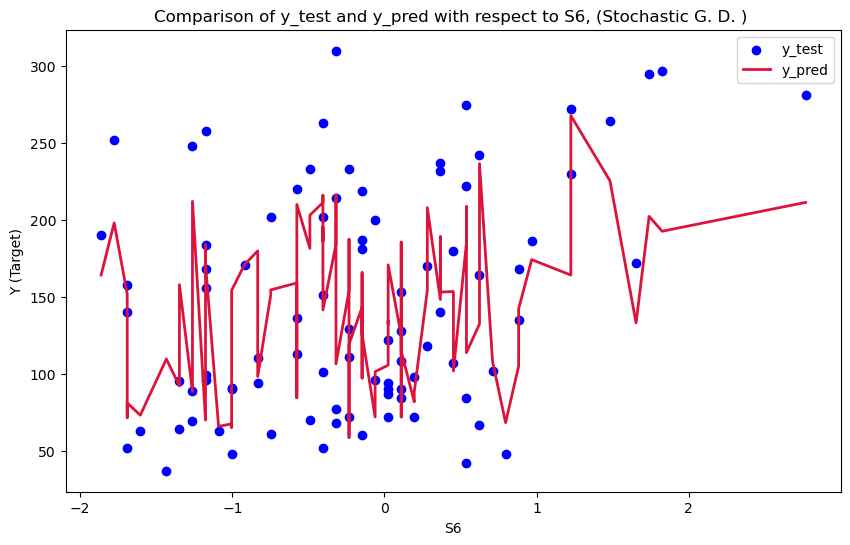

In [38]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_sgd[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Stochastic G. D. ) ')
plt.legend()

# Show plot
plt.show()

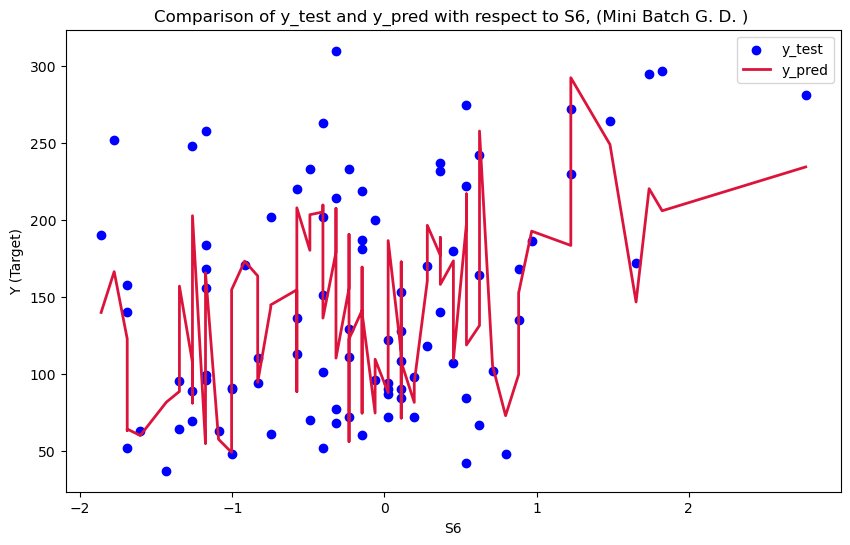

In [39]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_mini_batch[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Mini Batch G. D. ) ')
plt.legend()

# Show plot
plt.show()

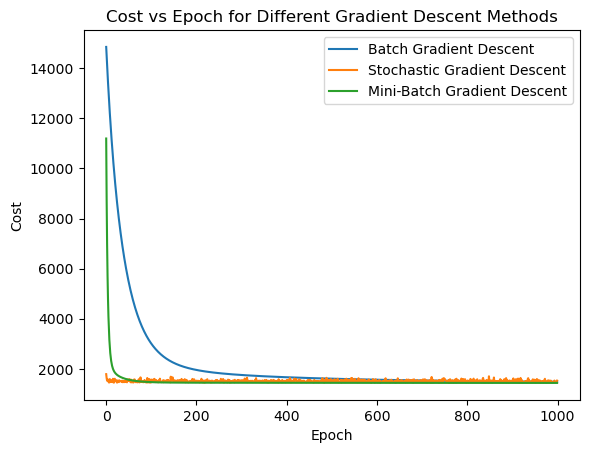

In [40]:
# Plot the cost histories
plt.plot(history_batch, label='Batch Gradient Descent')
plt.plot(history_sgd, label='Stochastic Gradient Descent')
plt.plot(history_mini_batch, label='Mini-Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost vs Epoch for Different Gradient Descent Methods')
plt.show()

## 6. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)

## (a) Ridge Regression

In [41]:
Model_list.append('Ridge Regr.')

In [42]:
ridge_reg = Ridge(alpha=0.1)
start_time = time.time()
ridge_reg.fit(X_train, y_train)
end_time = time.time()

time_ridge = end_time - start_time
Training_time_list.append(time_ridge)

y_pred_ridge = ridge_reg.predict(X_test)


In [43]:
y_pred_ridge_train = ridge_reg.predict(X_train)

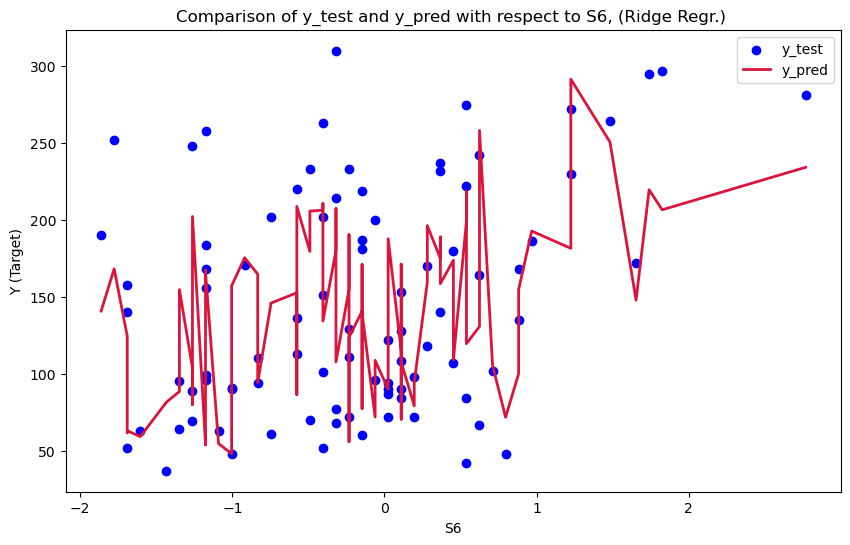

In [44]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_ridge[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Ridge Regr.) ')
plt.legend()

# Show plot
plt.show()

## (b) Lasso Regression

In [45]:
Model_list.append('Lasso Regr.')

In [46]:
lasso_reg = Lasso(alpha=0.1)
start_time = time.time()
lasso_reg.fit(X_train, y_train)
end_time = time.time()

time_lasso = end_time - start_time
Training_time_list.append(time_lasso)

y_pred_lasso = lasso_reg.predict(X_test)

In [47]:
y_pred_lasso_train = lasso_reg.predict(X_train)

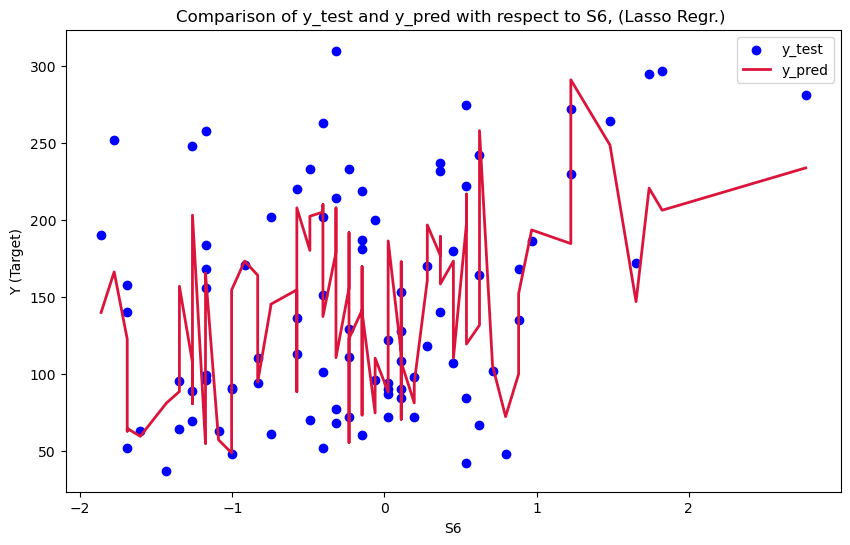

In [48]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_lasso[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Lasso Regr.) ')
plt.legend()

# Show plot
plt.show()

## (c) Elastic Net Regression

In [49]:
Model_list.append('Elastic Net Regr.')

In [50]:
elastic_net_reg = ElasticNet(alpha=0.1)
start_time = time.time()
elastic_net_reg.fit(X_train, y_train)
end_time = time.time()

time_elastic_net = end_time - start_time
Training_time_list.append(time_elastic_net)

y_pred_elastic = elastic_net_reg.predict(X_test)

In [51]:
y_pred_elastic_train = elastic_net_reg.predict(X_train)

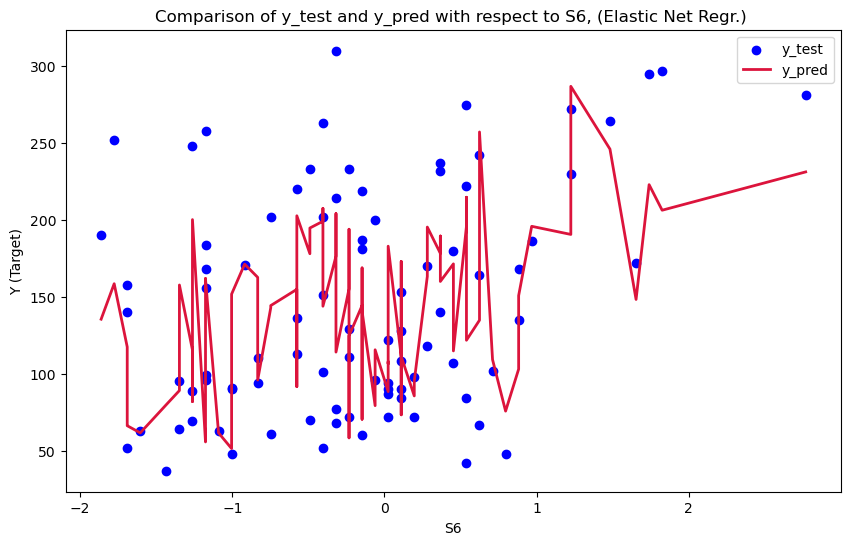

In [52]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_elastic[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Elastic Net Regr.) ')
plt.legend()

# Show plot
plt.show()

## (d) Early Stopping Regression

In [53]:
Model_list.append('Early Stopping')

In [54]:
sgd = SGDRegressor(penalty='elasticnet', early_stopping=True, validation_fraction=0.1, n_iter_no_change=5)
start_time = time.time()
sgd.fit(X_train, y_train)
end_time = time.time()

time_early_stopping = end_time - start_time
Training_time_list.append(time_early_stopping)

y_pred_sgd_early = sgd.predict(X_test)


In [55]:
y_pred_sgd_early_train = sgd.predict(X_train)

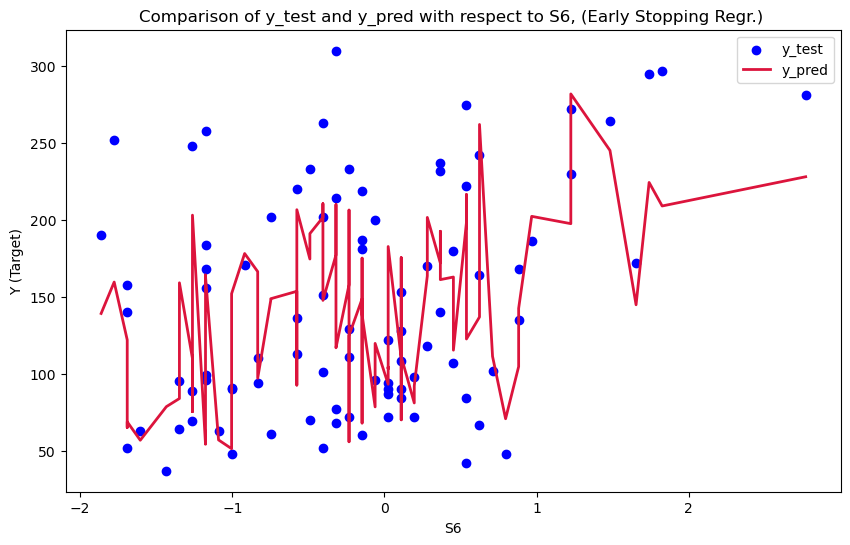

In [56]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_sgd_early[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Early Stopping Regr.) ')
plt.legend()

# Show plot
plt.show()

In [57]:
# Calculating performance metrics on training data
mae_ridge_train, mse_ridge_train, r2_ridge_train = calculate_metrics(y_train, y_pred_ridge_train)
mae_lasso_train, mse_lasso_train, r2_lasso_train = calculate_metrics(y_train, y_pred_lasso_train)
mae_elastic_train, mse_elastic_train, r2_elastic_train = calculate_metrics(y_train, y_pred_elastic_train)
mae_early_train, mse_early_train, r2_early_train = calculate_metrics(y_train, y_pred_sgd_early_train)

MAE_list_train.append(mae_ridge_train)
MAE_list_train.append(mae_lasso_train)
MAE_list_train.append(mae_elastic_train)
MAE_list_train.append(mae_early_train)

MSE_list_train.append(mse_ridge_train)
MSE_list_train.append(mse_lasso_train)
MSE_list_train.append(mse_elastic_train)
MSE_list_train.append(mse_early_train)

R2_list_train.append(r2_ridge_train)
R2_list_train.append(r2_lasso_train)
R2_list_train.append(r2_elastic_train)
R2_list_train.append(r2_early_train)


# Calculating performance metrics on test data
mae_ridge, mse_ridge, r2_ridge = calculate_metrics(y_test, y_pred_ridge)
mae_lasso, mse_lasso, r2_lasso = calculate_metrics(y_test, y_pred_lasso)
mae_elastic, mse_elastic, r2_elastic = calculate_metrics(y_test, y_pred_elastic)
mae_early, mse_early, r2_early = calculate_metrics(y_test, y_pred_sgd_early)

MAE_list.append(mae_ridge)
MAE_list.append(mae_lasso)
MAE_list.append(mae_elastic)
MAE_list.append(mae_early)

MSE_list.append(mse_ridge)
MSE_list.append(mse_lasso)
MSE_list.append(mse_elastic)
MSE_list.append(mse_early)

R2_list.append(r2_ridge)
R2_list.append(r2_lasso)
R2_list.append(r2_elastic)
R2_list.append(r2_early)

# Printing performance metrics
print("Ridge Regression on Training Data Performance Metrics:")
print_performance_metric(mae_ridge_train, mse_ridge_train, r2_ridge_train)
print("\n------------------------------------------------")
print("Ridge Regression on Test Data Performance Metrics:")
print_performance_metric(mae_ridge, mse_ridge, r2_ridge)
print("\n------------------------------------------------")
print("\n------------------------------------------------")


print("Lasso Regression on Training Data  Performance Metrics:")
print_performance_metric(mae_lasso_train, mse_lasso, r2_lasso_train)
print("\n------------------------------------------------")
print("Lasso Regression on Test Data  Performance Metrics:")
print_performance_metric(mae_lasso, mse_lasso, r2_lasso)
print("\n------------------------------------------------")
print("\n------------------------------------------------")

print("Elastic Net Regression on Training Data Performance Metrics:")
print_performance_metric(mae_elastic_train, mse_elastic_train, r2_elastic_train)
print("\n------------------------------------------------")
print("Elastic Net Regression on Test Data Performance Metrics:")
print_performance_metric(mae_elastic, mse_elastic, r2_elastic)
print("\n------------------------------------------------")
print("\n------------------------------------------------")

print("Early Stopping Regression on Training Data Performance Metrics:")
print_performance_metric(mae_early_train, mse_early_train, r2_early_train)
print("\n------------------------------------------------")
print("Early Stopping Regression on Test Data Performance Metrics:")
print_performance_metric(mae_early, mse_early, r2_early)



Ridge Regression on Training Data Performance Metrics:
Mean Absolute Error (MAE): 43.48419054683106.
Mean Squared Error (MSE): 2868.5779679559596.
R-squared Score (R^2): 0.5279147347118944.

------------------------------------------------
Ridge Regression on Test Data Performance Metrics:
Mean Absolute Error (MAE): 42.797155724820975.
Mean Squared Error (MSE): 2899.0322285365114.
R-squared Score (R^2): 0.45282197148313197.

------------------------------------------------

------------------------------------------------
Lasso Regression on Training Data  Performance Metrics:
Mean Absolute Error (MAE): 43.522187737140825.
Mean Squared Error (MSE): 2884.4277469729086.
R-squared Score (R^2): 0.5272130365414991.

------------------------------------------------
Lasso Regression on Test Data  Performance Metrics:
Mean Absolute Error (MAE): 42.8146495263235.
Mean Squared Error (MSE): 2884.4277469729086.
R-squared Score (R^2): 0.455578495315748.

--------------------------------------------

## 7. Normal Equation

In [58]:
Model_list.append('Normal Equation')

In [59]:
def normal_equation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add x0 = 1 to each instance
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

In [60]:
start_time = time.time()
theta_ne = normal_equation(X_train, y_train)
end_time = time.time()

time.ne = end_time - start_time

Training_time_list.append(time.ne)

def predict_normal_equation(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add x0 = 1 to each instance
    return X_b.dot(theta)

y_pred_ne_train = predict_normal_equation(X_train, theta_ne)
y_pred_ne = predict_normal_equation(X_test, theta_ne)

# Calculate performance metrics on training data
mae_ne_train , mse_ne_train, r2_ne_train = calculate_metrics(y_train, y_pred_ne_train)
MAE_list_train.append(mae_ne_train)
MSE_list_train.append(mse_ne_train)
R2_list_train.append(r2_ne_train)

# Print performance metrics Training Data
print("Normal Equation on Training Data Performance Metrics")
print_performance_metric(mae_ne_train, mse_ne_train, r2_ne_train)
print("\n------------------------------------------------")

    
# Calculate performance metrics on test data
mae_ne , mse_ne, r2_ne = calculate_metrics(y_test, y_pred_ne)
MAE_list.append(mae_ne)
MSE_list.append(mse_ne)
R2_list.append(r2_ne)

# Print performance metrics
print("Normal Equation on Test Data Performance Metrics")
print_performance_metric(mae_ne, mse_ne, r2_ne)

Normal Equation on Training Data Performance Metrics
Mean Absolute Error (MAE): 43.483503523980396.
Mean Squared Error (MSE): 2868.5497028355776.
R-squared Score (R^2): 0.5279193863361498.

------------------------------------------------
Normal Equation on Test Data Performance Metrics
Mean Absolute Error (MAE): 42.7940946795999.
Mean Squared Error (MSE): 2900.193628493473.
R-squared Score (R^2): 0.45260276297192104.


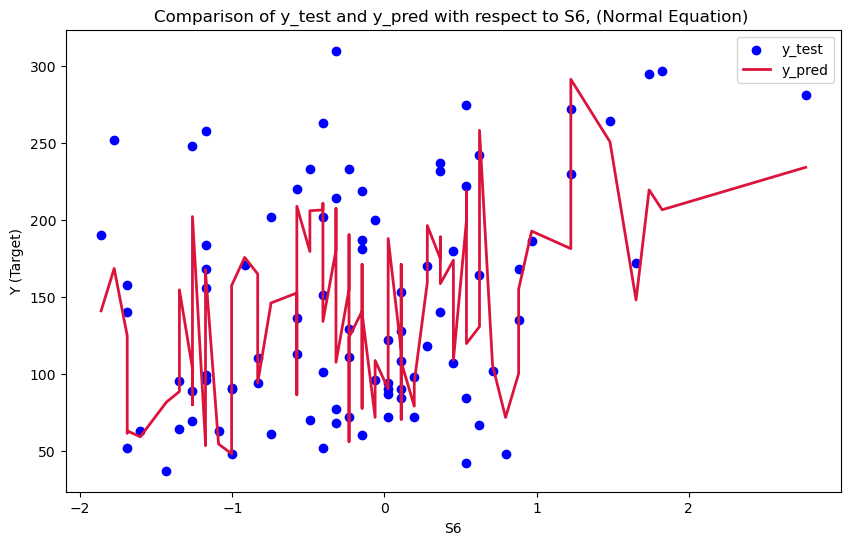

In [61]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_ne[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (Normal Equation) ')
plt.legend()

# Show plot
plt.show()


## 8. Implement linear Regression using SVD

In [62]:
Model_list.append('SVD Equation')

In [63]:
def svd_equation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add x0 = 1 to each instance
    
    # Perform SVD
    U, S, Vt = np.linalg.svd(X_b, full_matrices=False)
    
    # Compute the inverse of S
    S_inv = np.diag(1 / S)
    
    # Compute theta
    theta = (Vt.T) @ S_inv @ (U.T) @y
    
    return theta



In [64]:
start_time = time.time()
# Use the svd equation to find theta
theta_svd = svd_equation(X_train, y_train)
end_time = time.time()

time.svd = end_time - start_time
Training_time_list.append(time.svd)


# Predict using the svd equation
def predict_svd_equation(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add x0 = 1 to each instance
    return X_b @ theta

y_pred_svd_train = predict_svd_equation(X_train, theta_svd)
y_pred_svd = predict_svd_equation(X_test, theta_svd)

# Calculate performance metrics on Training Data
mae_svd_train, mse_svd_train, r2_svd_train = calculate_metrics(y_train, y_pred_svd_train)

MAE_list_train.append(mae_svd_train)
MSE_list_train.append(mse_svd_train)
R2_list_train.append(r2_svd_train)

# Print the performance metrics
print("SVD Equation on Training Data Performance Metrics")
print_performance_metric(mae_svd_train, mse_svd_train, r2_svd_train)
print("\n------------------------------------------------")


# Calculate performance metrics on Test Data
mae_svd, mse_svd, r2_svd = calculate_metrics(y_test, y_pred_svd)

MAE_list.append(mae_svd)
MSE_list.append(mse_svd)
R2_list.append(r2_svd)

# Print the performance metrics
print("SVD Equation on Test Data Performance Metrics")
print_performance_metric(mae_svd, mse_svd, r2_svd)


SVD Equation on Training Data Performance Metrics
Mean Absolute Error (MAE): 43.48350352398039.
Mean Squared Error (MSE): 2868.5497028355776.
R-squared Score (R^2): 0.5279193863361498.

------------------------------------------------
SVD Equation on Test Data Performance Metrics
Mean Absolute Error (MAE): 42.79409467959996.
Mean Squared Error (MSE): 2900.193628493484.
R-squared Score (R^2): 0.45260276297191904.


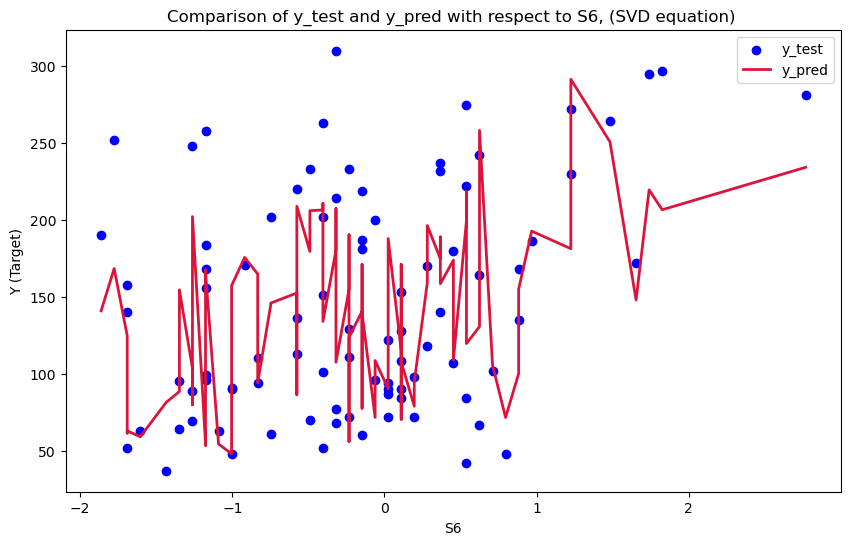

In [65]:
# Create a 2D plot to compare y_test and y_pred with respect to S6
plt.figure(figsize=(10, 6))

# Plot actual y_test values as scatter
plt.scatter(X_test['S6'], y_test, color='blue', label='y_test')

# Sort BMI values and corresponding y_pred for smoother curve
sorted_indices = np.argsort(X_test['S6'])
x_sorted = X_test['S6'].iloc[sorted_indices]
y_pred_sorted = y_pred_svd[sorted_indices]

# Plot predicted y_pred values as a curve
plt.plot(x_sorted, y_pred_sorted, color='crimson', label='y_pred', linewidth=2)

# Set axis labels
plt.xlabel('S6')
plt.ylabel('Y (Target)')

# Add title and legend
plt.title('Comparison of y_test and y_pred with respect to S6, (SVD equation) ')
plt.legend()

# Show plot
plt.show()

## 9. Performance Metrics and Computational Analysis

In [66]:
# Combine lists into a dictionary
data = {
    'Model': Model_list,
    'Training Time(Secs.)': Training_time_list,
    'MAE_Training': MAE_list_train,
    'MAE_Test': MAE_list,
    'MSE_Training': MSE_list_train,
    'MSE_Test': MSE_list,
    'R^2_Score_Training': R2_list_train,
    'R^2_Score_Test': R2_list
}
pd.options.display.float_format = '{:.5f}'.format

# Create DataFrame
perf_and_train = pd.DataFrame(data)

perf_and_train.index = range(1, len(perf_and_train)+1)
# Display DataFrame
print(perf_and_train)

                    Model  Training Time(Secs.)  MAE_Training  MAE_Test  \
1            Linear Regr.               0.01271      43.48350  42.79409   
2   Poly. Regr., degree 2               0.01442      39.14261  43.58169   
3   Poly. Regr., degree 3               0.01672      18.68896 164.85390   
4   Poly. Regr., degree 4               0.25376       0.00000 273.36766   
5             Batch G. D.               0.23593      44.49361  43.84553   
6        Stochastic G. D.              32.77115      44.55324  43.73450   
7        Mini-batch G. D.               3.44809      43.49463  42.81976   
8             Ridge Regr.               0.00827      43.48419  42.79716   
9             Lasso Regr.               0.01573      43.52219  42.81465   
10      Elastic Net Regr.               0.00000      43.80855  43.03119   
11         Early Stopping               0.03952      43.92243  42.95299   
12        Normal Equation               0.00000      43.48350  42.79409   
13           SVD Equation

In [67]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'lime', 'pink', 'teal', 'navy']
colors2 = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'gold', 'violet', 'turquoise', 'salmon', 'khaki', 'plum', 'lightseagreen', 'mediumorchid', 'cornflowerblue']

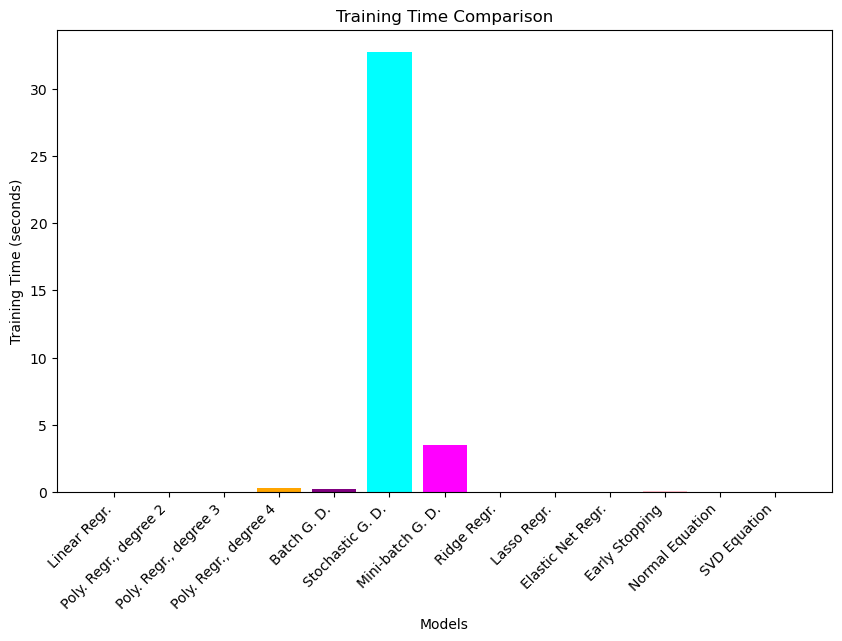

In [68]:
# Plotting the training times
plt.figure(figsize=(10, 6))
plt.bar(Model_list, Training_time_list, color=colors)
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.show()


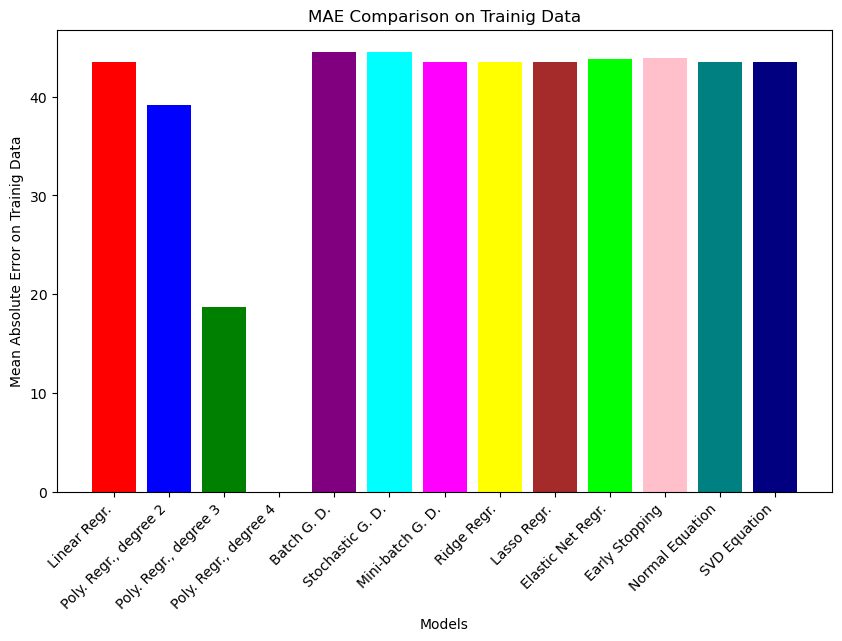

In [69]:
plt.figure(figsize=(10, 6))
plt.bar(Model_list, MAE_list_train, color=colors)
plt.ylabel('Mean Absolute Error on Trainig Data')
plt.xlabel('Models')
plt.title('MAE Comparison on Trainig Data')

# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

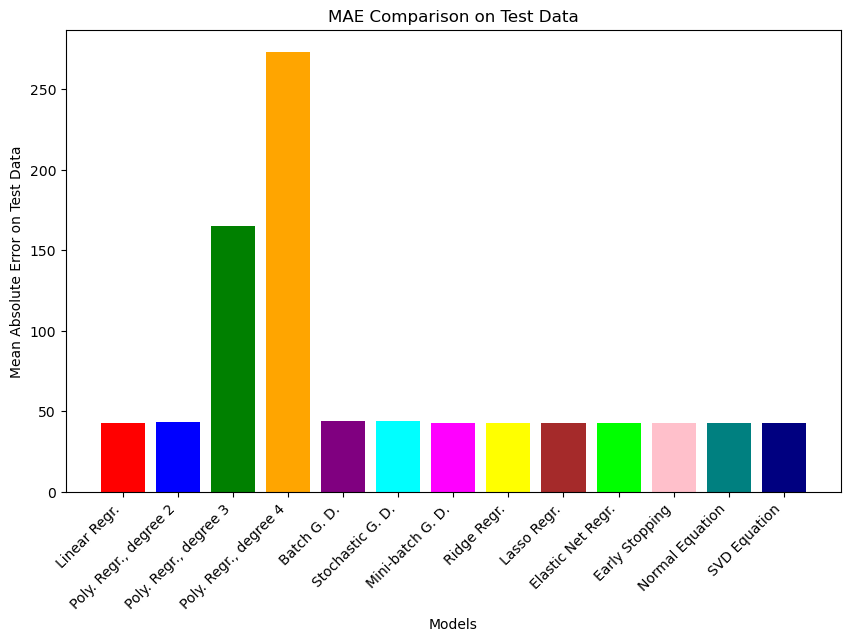

In [70]:
plt.figure(figsize=(10, 6))

# Use bar to plot vertical bars with Model_list on the x-axis
plt.bar(Model_list, MAE_list, color=colors)
plt.ylabel('Mean Absolute Error on Test Data')
plt.xlabel('Models')
plt.title('MAE Comparison on Test Data')

# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

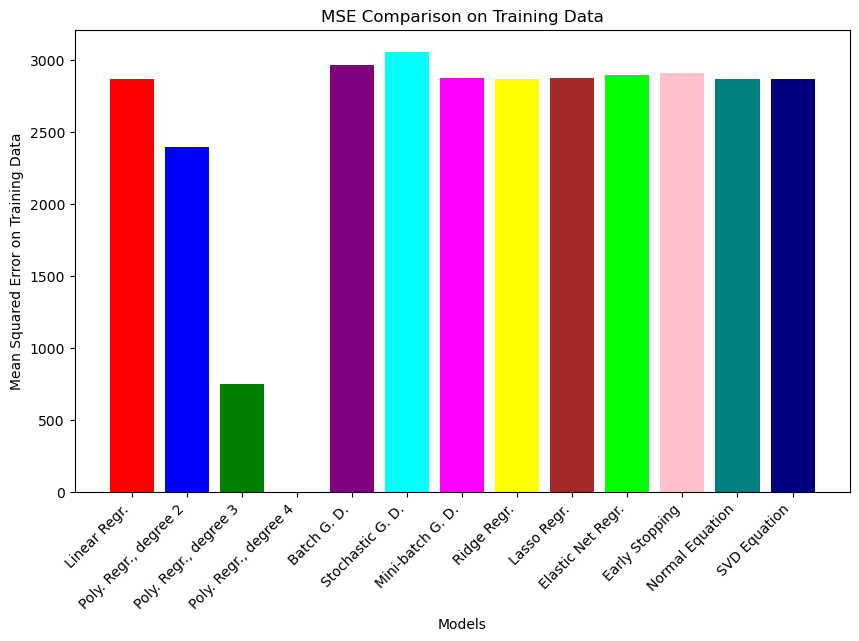

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(Model_list, MSE_list_train, color=colors)
plt.ylabel('Mean Squared Error on Training Data')
plt.xlabel('Models')
plt.title('MSE Comparison on Training Data')

# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

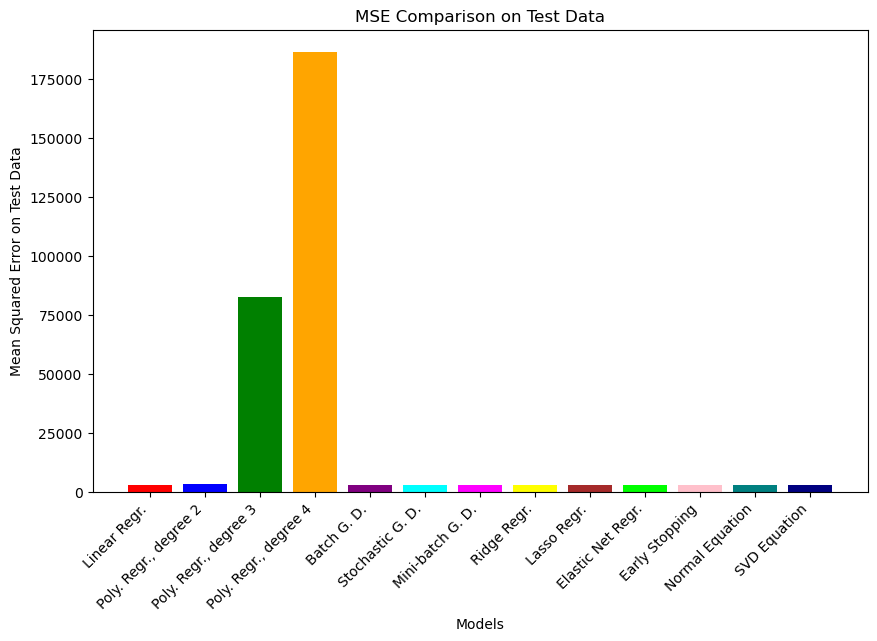

In [72]:
plt.figure(figsize=(10, 6))

# Use bar to plot vertical bars with Model_list on the x-axis
plt.bar(Model_list, MSE_list, color=colors)
plt.ylabel('Mean Squared Error on Test Data')
plt.xlabel('Models')
plt.title('MSE Comparison on Test Data')

# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

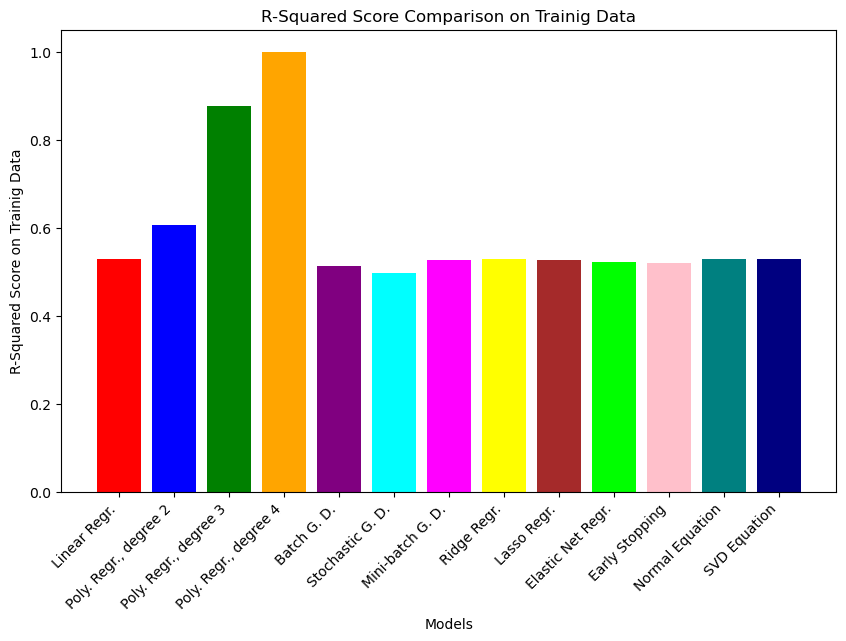

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(Model_list, R2_list_train, color=colors)
plt.ylabel('R-Squared Score on Trainig Data')
plt.xlabel('Models')
plt.title('R-Squared Score Comparison on Trainig Data')

# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

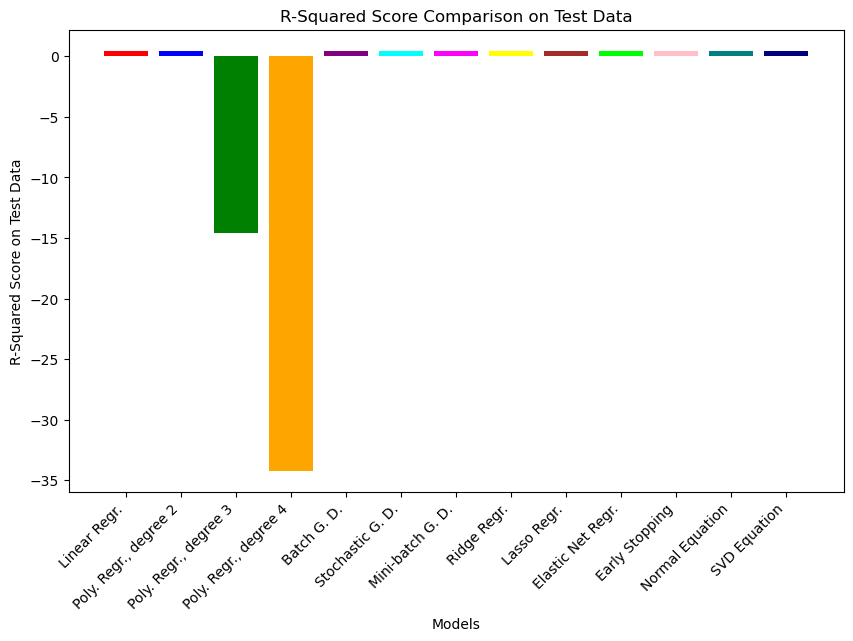

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(Model_list, R2_list, color=colors)
plt.ylabel('R-Squared Score on Test Data')
plt.xlabel('Models')
plt.title('R-Squared Score Comparison on Test Data')

# Rotate the labels on the x-axis by 45 degrees to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()

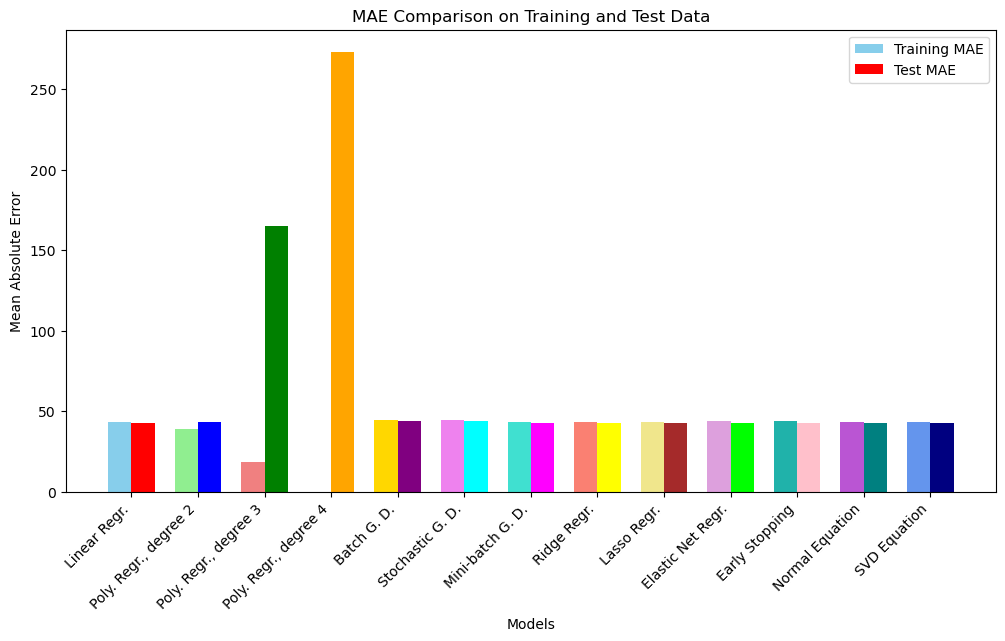

In [75]:
# Set the width of the bars
bar_width = 0.35

index = np.arange(len(Model_list))
plt.figure(figsize=(12, 6))

# Plot the bars for train data
plt.bar(index - bar_width/2, MAE_list_train, bar_width, label='Training MAE', color=colors2)

# Plot the bars for test data
plt.bar(index + bar_width/2, MAE_list, bar_width, label='Test MAE', color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Comparison on Training and Test Data')
plt.xticks(index, Model_list, rotation=45, ha='right')


plt.legend()

plt.show()

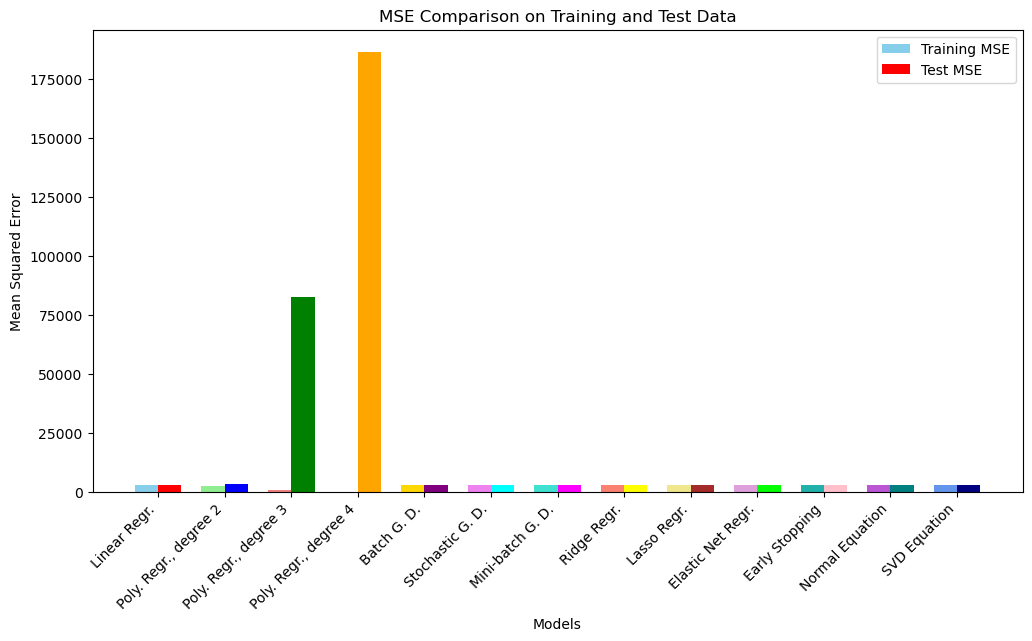

In [76]:
# Set the width of the bars
bar_width = 0.35

index = np.arange(len(Model_list))
plt.figure(figsize=(12, 6))


# Plot the bars for train data
plt.bar(index - bar_width/2, MSE_list_train, bar_width, label='Training MSE', color=colors2)

# Plot the bars for test data
plt.bar(index + bar_width/2, MSE_list, bar_width, label='Test MSE', color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison on Training and Test Data')
plt.xticks(index, Model_list, rotation=45, ha='right')


plt.legend()

plt.show()

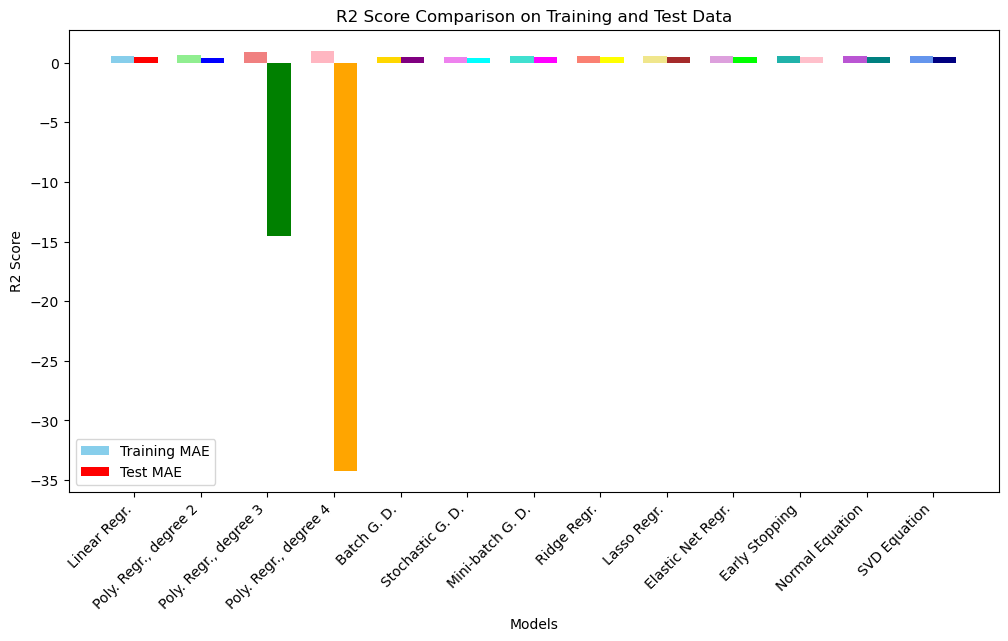

In [77]:
# Set the width of the bars
bar_width = 0.35

index = np.arange(len(Model_list))
plt.figure(figsize=(12, 6))


# Plot the bars for train data
plt.bar(index - bar_width/2, R2_list_train, bar_width, label='Training MAE', color=colors2)

# Plot the bars for test data
plt.bar(index + bar_width/2, R2_list, bar_width, label='Test MAE', color=colors)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison on Training and Test Data')
plt.xticks(index, Model_list, rotation=45, ha='right')


plt.legend()

plt.show()

In [78]:
print(perf_and_train)

                    Model  Training Time(Secs.)  MAE_Training  MAE_Test  \
1            Linear Regr.               0.01271      43.48350  42.79409   
2   Poly. Regr., degree 2               0.01442      39.14261  43.58169   
3   Poly. Regr., degree 3               0.01672      18.68896 164.85390   
4   Poly. Regr., degree 4               0.25376       0.00000 273.36766   
5             Batch G. D.               0.23593      44.49361  43.84553   
6        Stochastic G. D.              32.77115      44.55324  43.73450   
7        Mini-batch G. D.               3.44809      43.49463  42.81976   
8             Ridge Regr.               0.00827      43.48419  42.79716   
9             Lasso Regr.               0.01573      43.52219  42.81465   
10      Elastic Net Regr.               0.00000      43.80855  43.03119   
11         Early Stopping               0.03952      43.92243  42.95299   
12        Normal Equation               0.00000      43.48350  42.79409   
13           SVD Equation

### Analysis

#### 1. Linear Regression
Though, linear regression is a simple model, the error metrics are decent enough both for training and testing. It also provide a quick training time. So we can say it is an balance model with moderate computation efficiency and acceptable performance.

#### 2. Polynomial Regression with degrre 2, 3, 4
Since, second order polynomial regression is more complex than linear regression so it will take slightly more time to train a model. It has less errors on training set comapare to other models except polynomial regression with degree 3 and 4. 

Both these higher-degree polynomial regressions, at degree 3 and degree 4, overfit the training data. While they perform considerably well during training, their test performance is poor with error metrics being extremely high-a matter of alarm indicating that the models do not generalize well on unseen data. Besides, the training time for the fourth-degree polynomial model is notably higher. These models are not recommended due to overfitting and inefficiency.

#### 3. Gradient Descent Methods
(i) Batch gradient descent shows similar performance metrics to linear regression with longer training time. Though, gradient descent is a very good optimization method, but in this specific problem context it does not providee any significant benefits compared to simpler models.
 
(ii) Stochastic gradient descent takes highest training time. Like batch gradient descent its error metrics are also comparable to simpler models. The exceptionally high computational cost, making it inefficient for this problem. 

(iii) Mini batch gradient descent takes second highest training time. Since, its performance is same as linear regression it is not providing any significant improvement in terms of accuracy or performance metrics.

#### 4. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)

Among these, the regularization-based models including Ridge, Lasso, and Elastic Net present a very good trade-off between computational efficiency and performance. They are indeed very fast to train, with performance that is on par or only slightly better than linear regression. Elastic Net presents a slightly more balanced solution between the Lasso and Ridge.

Early stopping generally provides better generalization in comparison to the other models and has a good reduction in test error while taking a bit longer to train. 

#### 5. Normal and SVD Equation
Both the normal and SVD equation methods are considered to perform like linear regression in performance metrics but they are faster than the linear regression.

## 10. Conclusion

#### Best model for accuracy
The Elastic Net Regression has the best balance between low test errors and relatively high R-squared scores. 

#### Best Model for Computational Efficiency
Ridge, Lasso, and Elastic Net stand out as the fastest models with very minimal training time.

#### Poor Models
Polynomial Regression (Degrees 3 and 4) significantly overfit and perform poorly on the test data.
Stochastic Gradient Descent is computationally too slow for the marginal benefits it offers.

#### In summary, Elastic Net Regression turned out to be the most efficient and reliable model. 